In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [5]:
# Load data
lefse = pd.read_csv('./COLON/Download/lefse_de_output.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted 

,Feature,Pvalues,FDR,P8,P11,P14,P28,LDAscore
33,Escherichia_Shigella,9.367800e-03,0.011509,3172100.000,1237800.00,1099800.0,8898.2,6.20
20,Lactobacillus,7.940500e-05,0.000155,6355400.000,6873700.00,3829800.0,3983900.0,6.18
26,Lachnospiraceae_NK4A136_group,5.857200e-04,0.000899,7707.600,129860.00,140870.0,672920.0,5.52
29,Parabacteroides,1.529700e-03,0.002122,0.000,2506.50,632720.0,13494.0,5.50
32,Bacteroides,4.758500e-03,0.006018,7582.300,133870.00,614140.0,121820.0,5.48
5,Streptococcus,2.365400e-06,0.000016,234680.000,481010.00,144310.0,1754.6,5.38
35,Rikenellaceae_RC9_gut_group,2.673300e-02,0.031068,4574.500,45519.00,461800.0,53389.0,5.36
3,Alistipes,5.269000e-07,0.000006,5389.100,701.83,152680.0,331660.0,5.22
13,Muribacter,1.883600e-05,0.000054,77390.000,286850.00,61786.0,0.0,5.16
15,Prevotellaceae_UCG_001,3.052100e-05,0.000074,4699.800,1729.50,28230.0,236160.0,5.07


In [6]:
# Specify the columns to consider for finding the max
columns_to_check = ['P8', 'P11', 'P14','P28']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 


,Feature,Pvalues,FDR,P8,P11,P14,P28,LDAscore,Response
33,Escherichia_Shigella,9.367800e-03,0.011509,3172100.000,1237800.00,1099800.0,8898.2,6.20,P8
20,Lactobacillus,7.940500e-05,0.000155,6355400.000,6873700.00,3829800.0,3983900.0,6.18,P11
26,Lachnospiraceae_NK4A136_group,5.857200e-04,0.000899,7707.600,129860.00,140870.0,672920.0,5.52,P28
29,Parabacteroides,1.529700e-03,0.002122,0.000,2506.50,632720.0,13494.0,5.50,P14
32,Bacteroides,4.758500e-03,0.006018,7582.300,133870.00,614140.0,121820.0,5.48,P14
5,Streptococcus,2.365400e-06,0.000016,234680.000,481010.00,144310.0,1754.6,5.38,P11
35,Rikenellaceae_RC9_gut_group,2.673300e-02,0.031068,4574.500,45519.00,461800.0,53389.0,5.36,P14
3,Alistipes,5.269000e-07,0.000006,5389.100,701.83,152680.0,331660.0,5.22,P28
13,Muribacter,1.883600e-05,0.000054,77390.000,286850.00,61786.0,0.0,5.16,P11
15,Prevotellaceae_UCG_001,3.052100e-05,0.000074,4699.800,1729.50,28230.0,236160.0,5.07,P28


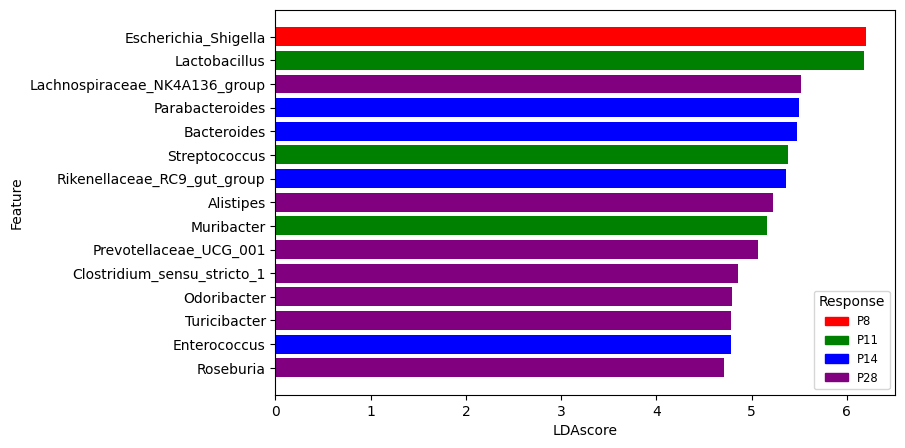

In [7]:
lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'P8': 'red', 'P11': 'green','P14': 'blue','P28': 'purple'})
plt.figure(figsize=(8, 5))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Feature'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Feature')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='P8')
blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='P14')
orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')

plt.show()

In [8]:
# Load data
lefse = pd.read_csv('./COLON/lefse_de_output_phyla.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted 

,Feature,Pvalues,FDR,P8,P11,P14,P28,LDAscore
2,Bacteroidetes,1.205600e-05,0.000020,60972.00,527950.0,3323900.00,3541600,6.24
4,Proteobacteria,4.860400e-04,0.000583,3249500.00,1537900.0,1170200.00,40857,6.21
5,Firmicutes,1.509800e-02,0.015098,6689200.00,7929600.0,5482400.00,6260400,6.09
3,Actinobacteria,1.326900e-05,0.000020,187.99,4511.8,16543.00,75447,4.58
1,Tenericutes,2.241700e-06,0.000007,187.99,0.0,6391.70,54517,4.44
0,Patescibacteria,2.674300e-07,0.000002,0.00,0.0,501.31,27154,4.13


In [9]:
columns_to_check = ['P8', 'P11', 'P14','P28']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 

,Feature,Pvalues,FDR,P8,P11,P14,P28,LDAscore,Response
2,Bacteroidetes,1.205600e-05,0.000020,60972.00,527950.0,3323900.00,3541600,6.24,P28
4,Proteobacteria,4.860400e-04,0.000583,3249500.00,1537900.0,1170200.00,40857,6.21,P8
5,Firmicutes,1.509800e-02,0.015098,6689200.00,7929600.0,5482400.00,6260400,6.09,P11
3,Actinobacteria,1.326900e-05,0.000020,187.99,4511.8,16543.00,75447,4.58,P28
1,Tenericutes,2.241700e-06,0.000007,187.99,0.0,6391.70,54517,4.44,P28
0,Patescibacteria,2.674300e-07,0.000002,0.00,0.0,501.31,27154,4.13,P28


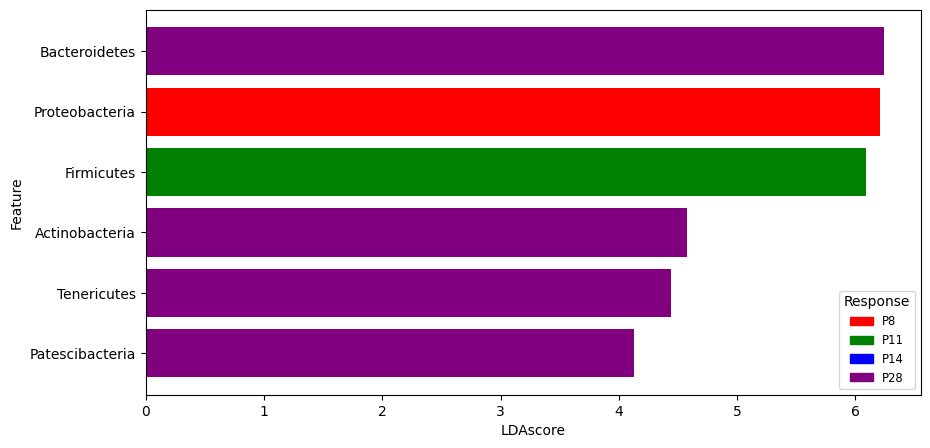

In [11]:
lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'P8': 'red', 'P11': 'green','P14': 'blue','P28': 'purple'})
plt.figure(figsize=(10, 5))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Feature'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Feature')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='P8')
blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='P14')
orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')

In [ ]:
# Load data
lefse = pd.read_csv('./COLON/lefse_de_output_phyla.csv',sep=',')
condition = (lefse['Pvalues'] < 0.05)
# Apply the condition to filter the data
lefse = lefse[condition]
lefse_sorted  = lefse.sort_values(by='LDAscore', ascending=False).head(15)
# Define the condition to filter the data (e.g., Category == 'X')
lefse_sorted 
columns_to_check = ['P8', 'P11', 'P14','P28']
# Find the column with the maximum value for each row
lefse_sorted ['Response'] = lefse_sorted [columns_to_check].idxmax(axis=1)
lefse_sorted 
lefse_sorted = lefse_sorted.sort_values(by='LDAscore', ascending=True)
colors = lefse_sorted ['Response'].map({'P8': 'red', 'P11': 'green','P14': 'blue','P28': 'purple'})
plt.figure(figsize=(10, 5))  # Adjust the figure size to fit the rotated chart
plt.barh(lefse_sorted ['Feature'], lefse_sorted ['LDAscore'], color=colors)  # Swap x and y
# max_value = lefse[['PBS-PBS', 'Lac-PBS', 'PBS-SCB34','Lac-SCB34']].max().max()
# Customize the plot
# plt.title('Rotated Bar Figure Based on Two Columns')
plt.xlabel('LDAscore')
plt.ylabel('Feature')

# Create a legend for 'Category' colors
red_patch = mpatches.Patch(color='red', label='P8')
blue_patch = mpatches.Patch(color='green', label='P11')
green_patch = mpatches.Patch(color='blue', label='P14')
orange_patch = mpatches.Patch(color='purple', label='P28')
plt.legend(handles=[red_patch, blue_patch,green_patch ,orange_patch ], title='Response', loc='lower right',fontsize='small')